In [81]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']

In [159]:
df = pd.read_csv('../data/7410_408.csv')
df

,wenshu_url,court,procedure,plaintiff' principal,plaintiff,defendant,plaintiff‘s birth,plaintiff's sex,defendant's birth,defendant's sex,result,udgment,opinion,focus,reason for defeat,legal,type
0,https://wenshu.court.gov.cn/website/wenshu/181...,深圳市罗湖区人民法院,first trail,1,深圳信和（集团）有限公司,陈小兰,NaN,NaN,1990.0,female,2,一、原告深圳信和（集团）有限公司应于本判决生效之日起十日内支付被告陈小兰2019年8月14日...,本院认为，原告确认公司人事部门工作人员于2020年11月23日在微信上收到被告发送的《被迫解...,0+3,NaN,"《深圳市员工工资支付条例（2019修订）》第二十三条', '《深圳市员工工资支付条例（201...",判决
1,https://wenshu.court.gov.cn/website/wenshu/181...,长沙市岳麓区人民法院,first trail,0,胡爱莲,"长沙爱思特医疗美容有限公司长沙爱思特医疗美容医院', '长沙爱思特医疗美容有限公司",1987.0,female,NaN,NaN,0,一、被告长沙爱思特医疗美容有限公司在本判决生效之日起五日内向原告胡爱莲支付产假期间工资差额2...,本院认为，胡爱莲自2009年8月17日入职并与爱思特美容医院签订了劳动合同，双方之间自此建立...,0,NaN,"《女职工劳动保护特别规定》第八条第一款', '《中华人民共和国劳动合同法（2012修正）》第...",判决
2,https://wenshu.court.gov.cn/website/wenshu/181...,北京市房山区人民法院,first trail,1,北京潮洋盛业服装服饰有限公司,朱丹丹,NaN,NaN,1989.0,female,2,一、北京潮洋盛业服装服饰有限公司于本判决生效之日起7日内支付朱丹丹解除劳动关系经济补偿金53...,本院认为：发生劳动争议，当事人对自己提出的主张，有责任提供证据。关于双方劳动关系解除的原因，...,0+1,NaN,"《中华人民共和国劳动法（2009修正）》第五十条', '《中华人民共和国劳动合同法（2012...",判决
3,https://wenshu.court.gov.cn/website/wenshu/181...,长春市南关区人民法院,first trail,0,李岩,吉林省百汇食品添加剂有限公司,1984.0,female,NaN,NaN,2,驳回李岩的诉讼请求。,本院认为，用人单位自用工之日起即与劳动者建立劳动关系。关于李岩主张未签订书面劳动合同二倍工资...,0+2,2,"《中华人民共和国劳动争议调解仲裁法》第二十七条', '《中华人民共和国劳动争议调解仲裁法》第...",判决
4,https://wenshu.court.gov.cn/website/wenshu/181...,唐山市路北区人民法院,first trail,0,安桃,燕赵财产保险股份有限公司,1990.0,female,NaN,NaN,2,驳回原告安桃的诉讼请求。\n案件受理费10元，由原告安桃负担。\n如不服本判决，可以在判决书...,本院认为，劳动者的合法权益受法律保护。原、被告自2016年4月21日起开始建立劳动关系，20...,2+4,0,"《中华人民共和国劳动合同法（2012修正）》第四十七条', '《中华人民共和国劳动合同法（2...",判决
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,https://wenshu.court.gov.cn/website/wenshu/181...,河南省洛阳市中级人民法院,second trail,0,张金,"杭州拓天科技有限公司', '浙江海博人力资源开发服务有限公司上虞分公司",1993.0,female,NaN,NaN,4,NaN,本院认为，拓天公司通过浙江海博公司为张金在浙江省绍兴市上虞区社会保险经办机构代缴了社会保险，...,1,1,NaN,判决
404,https://wenshu.court.gov.cn/website/wenshu/181...,辽宁省沈阳市中级人民法院,second trail,0,马力,沈阳深国际综合物流港置业有限公司,1981.0,male,NaN,NaN,4,NaN,本院认为，上诉人放弃关于年假工资、油补、2020年5月至10月份的工资5034.75元、过节...,0,1,NaN,判决
405,https://wenshu.court.gov.cn/website/wenshu/181...,江苏省镇江市中级人民法院,second trail,0,董泽慧,丹阳市宇天进出口有限公司,1988.0,female,NaN,NaN,5,NaN,本案的争议焦点为：宇天公司与董泽慧解除劳动关系是否符合法律规定。\n本院认为：宇天公司与董泽...,2,NaN,NaN,判决
406,https://wenshu.court.gov.cn/website/wenshu/181...,广东省深圳市中级人民法院,second trail,0,吴海连,千禧之星珠宝股份有限公司,1987.0,female,NaN,NaN,4,NaN,本院认为，《中华人民共和国人口与计划生育法》第十七条规定：“公民有生育的权利，也有依法实行计...,1,1,NaN,判决


In [85]:
# 女性原告的一审、二审案件数量
df_female = df.loc[(df["plaintiff's sex"]=='female')]
df_female1 = df_female[['plaintiff','procedure']]
df_female1

,plaintiff,procedure
1,胡爱莲,first trail
3,李岩,first trail
4,安桃,first trail
6,于雪莉,first trail
8,卓瑶,first trail
...,...,...
402,刘馨蔚,second trail
403,张金,second trail
405,董泽慧,second trail
406,吴海连,second trail


In [86]:
df_female1 = df_female1.groupby('procedure').count()
df_female1

,plaintiff
procedure,
first trail,135
second trail,48


In [88]:
# 男性原告的一审、二审案件数量
df_male = df.loc[(df["plaintiff's sex"]=='male')]
df_male1 = df_male[['plaintiff','procedure']]
df_male1

,plaintiff,procedure
16,杨振,first trail
29,仲尤红,first trail
40,王洪军,first trail
56,陆向荣,first trail
62,马慧杰,first trail
84,娄朝阳,first trail
117,马力,first trail
172,郝泽华,first trail
187,曾宪宇,first trail
270,李雷,second trail


In [89]:
df_male1 = df_male1.groupby('procedure').count()
df_male1

,plaintiff
procedure,
first trail,9
second trail,6


In [91]:
# 男、女一审二审数量占比
df_procedure = pd.concat([df_female1, df_male1], axis = 1)
df_procedure.columns = ['female','male']
df_procedure

,female,male
procedure,,
first trail,135,9
second trail,48,6


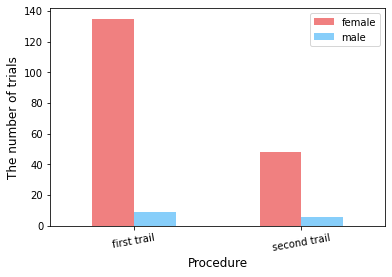

In [99]:
df_procedure.plot(kind='bar',rot=10, color=['lightcoral','lightskyblue'])
plt.ylabel('The number of trials', fontsize=12)
plt.xlabel('Procedure', fontsize=12)
plt.show()

In [100]:
# 原告为女性的不同判决结果人数
df_female2 = df_female[['plaintiff','result']]
df_female2

,plaintiff,result
1,胡爱莲,0
3,李岩,2
4,安桃,2
6,于雪莉,0
8,卓瑶,0
...,...,...
402,刘馨蔚,4
403,张金,4
405,董泽慧,5
406,吴海连,4


In [122]:
df_result = df_female2.groupby('result').count()
df_result.columns = ['female plaintiff']

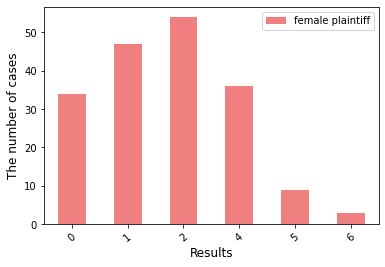

In [129]:
df_result.plot(kind="bar", rot=40, color='lightcoral')
plt.xlabel('Results',fontsize=12)
plt.ylabel('The number of cases',fontsize=12)
plt.show()

In [112]:
# 原告为男性案件中，不同判决结果人数的对比图
df_male2 = df_male[['plaintiff','result']]
df_male2

,plaintiff,result
16,杨振,2
29,仲尤红,2
40,王洪军,2
56,陆向荣,2
62,马慧杰,2
84,娄朝阳,1
117,马力,1
172,郝泽华,2
187,曾宪宇,0
270,李雷,5


In [131]:
df_result2 = df_male2.groupby('result').count()
df_result2.columns = ['male plaintiff']
df_result2

,male plaintiff
result,
0,1
1,2
2,6
4,5
5,1


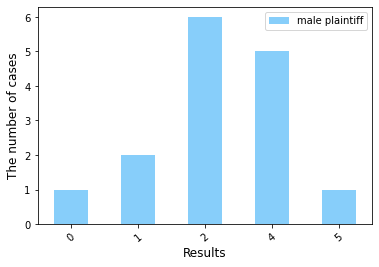

In [130]:
df_result2.plot(kind="bar", rot=40, color='lightskyblue')
plt.xlabel('Results',fontsize=12)
plt.ylabel('The number of cases',fontsize=12)
plt.show()

In [132]:
#一审、二审争议焦点比较
df

,wenshu_url,court,procedure,plaintiff' principal,plaintiff,defendant,plaintiff‘s birth,plaintiff's sex,defendant's birth,defendant's sex,result,udgment,opinion,focus,reason for defeat,legal,type
0,https://wenshu.court.gov.cn/website/wenshu/181...,深圳市罗湖区人民法院,first trail,1,深圳信和（集团）有限公司,陈小兰,NaN,NaN,1990.0,female,2,一、原告深圳信和（集团）有限公司应于本判决生效之日起十日内支付被告陈小兰2019年8月14日...,本院认为，原告确认公司人事部门工作人员于2020年11月23日在微信上收到被告发送的《被迫解...,0+3,NaN,"《深圳市员工工资支付条例（2019修订）》第二十三条', '《深圳市员工工资支付条例（201...",判决
1,https://wenshu.court.gov.cn/website/wenshu/181...,长沙市岳麓区人民法院,first trail,0,胡爱莲,"长沙爱思特医疗美容有限公司长沙爱思特医疗美容医院', '长沙爱思特医疗美容有限公司",1987.0,female,NaN,NaN,0,一、被告长沙爱思特医疗美容有限公司在本判决生效之日起五日内向原告胡爱莲支付产假期间工资差额2...,本院认为，胡爱莲自2009年8月17日入职并与爱思特美容医院签订了劳动合同，双方之间自此建立...,0,NaN,"《女职工劳动保护特别规定》第八条第一款', '《中华人民共和国劳动合同法（2012修正）》第...",判决
2,https://wenshu.court.gov.cn/website/wenshu/181...,北京市房山区人民法院,first trail,1,北京潮洋盛业服装服饰有限公司,朱丹丹,NaN,NaN,1989.0,female,2,一、北京潮洋盛业服装服饰有限公司于本判决生效之日起7日内支付朱丹丹解除劳动关系经济补偿金53...,本院认为：发生劳动争议，当事人对自己提出的主张，有责任提供证据。关于双方劳动关系解除的原因，...,0+1,NaN,"《中华人民共和国劳动法（2009修正）》第五十条', '《中华人民共和国劳动合同法（2012...",判决
3,https://wenshu.court.gov.cn/website/wenshu/181...,长春市南关区人民法院,first trail,0,李岩,吉林省百汇食品添加剂有限公司,1984.0,female,NaN,NaN,2,驳回李岩的诉讼请求。,本院认为，用人单位自用工之日起即与劳动者建立劳动关系。关于李岩主张未签订书面劳动合同二倍工资...,0+2,2,"《中华人民共和国劳动争议调解仲裁法》第二十七条', '《中华人民共和国劳动争议调解仲裁法》第...",判决
4,https://wenshu.court.gov.cn/website/wenshu/181...,唐山市路北区人民法院,first trail,0,安桃,燕赵财产保险股份有限公司,1990.0,female,NaN,NaN,2,驳回原告安桃的诉讼请求。\n案件受理费10元，由原告安桃负担。\n如不服本判决，可以在判决书...,本院认为，劳动者的合法权益受法律保护。原、被告自2016年4月21日起开始建立劳动关系，20...,2+4,0,"《中华人民共和国劳动合同法（2012修正）》第四十七条', '《中华人民共和国劳动合同法（2...",判决
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,https://wenshu.court.gov.cn/website/wenshu/181...,河南省洛阳市中级人民法院,second trail,0,张金,"杭州拓天科技有限公司', '浙江海博人力资源开发服务有限公司上虞分公司",1993.0,female,NaN,NaN,4,NaN,本院认为，拓天公司通过浙江海博公司为张金在浙江省绍兴市上虞区社会保险经办机构代缴了社会保险，...,1,1,NaN,判决
404,https://wenshu.court.gov.cn/website/wenshu/181...,辽宁省沈阳市中级人民法院,second trail,0,马力,沈阳深国际综合物流港置业有限公司,1981.0,male,NaN,NaN,4,NaN,本院认为，上诉人放弃关于年假工资、油补、2020年5月至10月份的工资5034.75元、过节...,0,1,NaN,判决
405,https://wenshu.court.gov.cn/website/wenshu/181...,江苏省镇江市中级人民法院,second trail,0,董泽慧,丹阳市宇天进出口有限公司,1988.0,female,NaN,NaN,5,NaN,本案的争议焦点为：宇天公司与董泽慧解除劳动关系是否符合法律规定。\n本院认为：宇天公司与董泽...,2,6,NaN,判决
406,https://wenshu.court.gov.cn/website/wenshu/181...,广东省深圳市中级人民法院,second trail,0,吴海连,千禧之星珠宝股份有限公司,1987.0,female,NaN,NaN,4,NaN,本院认为，《中华人民共和国人口与计划生育法》第十七条规定：“公民有生育的权利，也有依法实行计...,1,1,NaN,判决


In [139]:
# 一审争议焦点统计
df1 = df.loc[(df["procedure"]=='first trail')]
df_focus = df1[['focus','procedure']]
df_focus

,focus,procedure
0,0+3,first trail
1,0,first trail
2,0+1,first trail
3,0+2,first trail
4,2+4,first trail
...,...,...
210,2,first trail
211,0,first trail
212,2,first trail
213,0+1,first trail


In [142]:
df_focus1 = df_focus.groupby('focus').count()
df_focus1.columns = ['first trial']
df_focus1

,first trial
focus,
0,79
0+1,28
0+1+2,5
0+1+3,1
0+2,34
0+2+3,3
0+2+4,1
0+3,4
1,36


In [146]:
# 二审争议焦点统计
df2 = df.loc[(df["procedure"]=='second trail')]
df_focus2 = df2[['focus','procedure']]
df_focus2

,focus,procedure
215,0+1,second trail
216,2,second trail
217,2,second trail
218,0,second trail
219,3,second trail
...,...,...
403,1,second trail
404,0,second trail
405,2,second trail
406,1,second trail


In [147]:
df_focus2 = df_focus2.groupby('focus').count()
df_focus2.columns = ['second trial']
df_focus2

,second trial
focus,
0,100
0+1,19
0+1+2,3
0+1+2+4,1
0+1+3,1
0+1+4,1
0+2,16
0+3,2
0+5,1


In [160]:
# 个人败诉理由数量统计
df3 = df.loc[(df["procedure"]=='first trail')]
df_reason = df3[['reason for defeat','procedure']]
df_reason

,reason for defeat,procedure
0,NaN,first trail
1,NaN,first trail
2,NaN,first trail
3,2,first trail
4,0,first trail
...,...,...
210,NaN,first trail
211,NaN,first trail
212,NaN,first trail
213,NaN,first trail


In [161]:
df_reason1 = df_reason.groupby('reason for defeat').count()
df_reason1

,procedure
reason for defeat,
0,16
0+1,3
0+2,2
1,39
2,9


In [162]:
df4 = df.loc[(df["procedure"]=='second trail')]
df_reason2 = df4[['reason for defeat','procedure']]
df_reason2

,reason for defeat,procedure
215,NaN,second trail
216,NaN,second trail
217,1,second trail
218,NaN,second trail
219,NaN,second trail
...,...,...
403,1,second trail
404,1,second trail
405,NaN,second trail
406,1,second trail


In [163]:
df_reason3 = df_reason2.groupby('reason for defeat').count()
df_reason3

,procedure
reason for defeat,
0,13
0+1,2
0+2,1
1,34
2,4
